In [2]:
! wget http://cb.lk/covid_19

--2020-10-01 09:25:43--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-10-01 09:25:44--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-10-01 09:25:45--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-10-01 09:25:45--  https://www.dropbox.com/s/raw/7rjw

In [3]:
! unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_0

In [4]:
# Giving the Train and Test path of dataset
Train_path='CovidDataset/Train'
val_path='CovidDataset/Val'

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.preprocessing import image

In [21]:
# BUILDING the CNN MODEL using KERAS
from keras.models import  Sequential
from keras.layers import Dense, Dropout
model=Sequential()
model.add(Conv2D(32,kernel_size=(32,32),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])






In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 193, 193, 32)      98336     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 191, 191, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 95, 95, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 95, 95, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 93, 93, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 46, 46, 64)       

In [23]:
# TRAIN the model
train_data=image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_dataset=image.ImageDataGenerator(rescale=1./255)

In [24]:
train_generater=train_data.flow_from_directory('CovidDataset/Train',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary')




Found 224 images belonging to 2 classes.


In [25]:
train_generater.class_indices

{'Covid': 0, 'Normal': 1}

In [26]:
# validation dataset
validation_generater=test_dataset.flow_from_directory('CovidDataset/Val',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary')



Found 60 images belonging to 2 classes.


In [71]:
final_model=model.fit(train_generater,
                     #steps_per_epoch=,
                     epochs=15,
                     validation_data=validation_generater)
                     #validation_steps=2)

Epoch 1/15
7/7 [==============================] - 11s 2s/step - loss: 0.2565 - accuracy: 0.9107 - val_loss: 0.1853 - val_accuracy: 0.9333
Epoch 2/15
7/7 [==============================] - 9s 1s/step - loss: 0.2074 - accuracy: 0.9241 - val_loss: 0.1850 - val_accuracy: 0.9333
Epoch 3/15
7/7 [==============================] - 10s 1s/step - loss: 0.1768 - accuracy: 0.9375 - val_loss: 0.1897 - val_accuracy: 0.9500
Epoch 4/15
7/7 [==============================] - 9s 1s/step - loss: 0.2027 - accuracy: 0.9464 - val_loss: 0.1650 - val_accuracy: 0.9333
Epoch 5/15
7/7 [==============================] - 10s 1s/step - loss: 0.1120 - accuracy: 0.9509 - val_loss: 0.2094 - val_accuracy: 0.9500
Epoch 6/15
7/7 [==============================] - 9s 1s/step - loss: 0.1129 - accuracy: 0.9554 - val_loss: 0.2013 - val_accuracy: 0.9500
Epoch 7/15
7/7 [==============================] - 10s 1s/step - loss: 0.1188 - accuracy: 0.9598 - val_loss: 0.2604 - val_accuracy: 0.9500
Epoch 8/15
7/7 [=====================

In [72]:
# save our model
model.save('model_xray.h5')

In [73]:
model.evaluate(train_generater)

7/7 [==============================] - 7s 1s/step - loss: 0.1020 - accuracy: 0.9598


[0.10198207199573517, 0.9598214030265808]

In [74]:
model.evaluate(validation_generater)

2/2 [==============================] - 1s 352ms/step - loss: 0.2129 - accuracy: 0.9667


[0.21292613446712494, 0.9666666388511658]

In [75]:
from keras.models import load_model
model=load_model('model_xray.h5')

In [76]:
train_generater.class_indices

{'Covid': 0, 'Normal': 1}

In [77]:
y_actual=[]
y_test=[]

In [78]:
import os
for i in os.listdir('./CovidDataset/Val/Normal/'):
  img=image.load_img('./CovidDataset/Val/Normal/'+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [79]:
import os
for i in os.listdir('./CovidDataset/Val/Covid/'):
  img=image.load_img('./CovidDataset/Val/Covid/'+i, target_size=(224,224))
  img=image.img_to_array(img)
  img=np.expand_dims(img,axis=0)
  p=model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [80]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [81]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)

In [82]:
import seaborn as sns


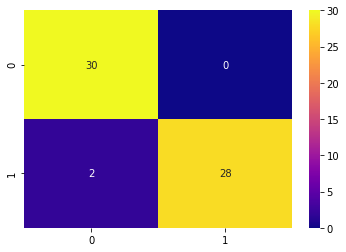

In [83]:
sns.heatmap(cm, cmap='plasma',annot=True)

In [96]:
from sklearn import metrics
print('precission:',metrics.precision_score(y_test,y_actual))

precission: 0.9333333333333333


In [97]:
print('recall:',metrics.recall_score(y_test,y_actual))

recall: 1.0
